# Import

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import norm, rayleigh, gamma
from tools import get_mids
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

matplotlib = sns.mpl
plt = matplotlib.pyplot
plt.style.use("../style.mplstyle")
warnings.filterwarnings("ignore")


Could not import healpy.
functions plot_area, add_catalog, and add_extended_plane will not work.


# Code from Rob

In [4]:
filname = "../resources/Linefit_angular_resolution_dataframe.csv"
dat = np.genfromtxt(filname, delimiter=",", names=True)


In [8]:
dat.dtype.names

('event_id',
 'resolution_linefit',
 'resolution_linefitNew',
 'zenith_angle',
 'zenith_linefit',
 'muon_energy',
 'aeffs')

In [40]:
from scipy.stats import t, norm, cauchy


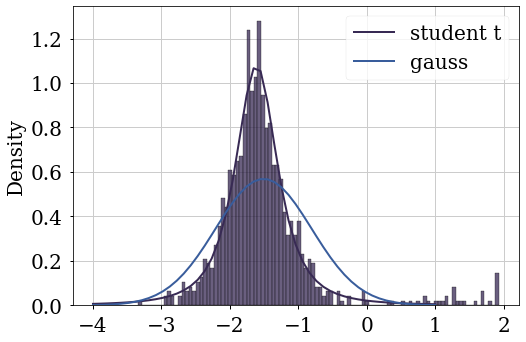

In [39]:
sns.histplot(np.log10(dat["resolution_linefitNew"]), bins=100, stat="density")

fit_t = t.fit(np.log10(dat["resolution_linefitNew"]))
fit_gauss = norm.fit(np.log10(dat["resolution_linefitNew"]))
fit_c = cauchy.fit(np.log10(dat["resolution_linefitNew"]))

xvals = np.linspace(-4, 1)
plt.plot(xvals, t.pdf(xvals, *fit_t), label="student t")
plt.plot(xvals, norm.pdf(xvals, *fit_gauss), label="gauss")
plt.plot(xvals, cauchy.pdf(xvals, *fit_cauchy), label="cauchy")
plt.legend()

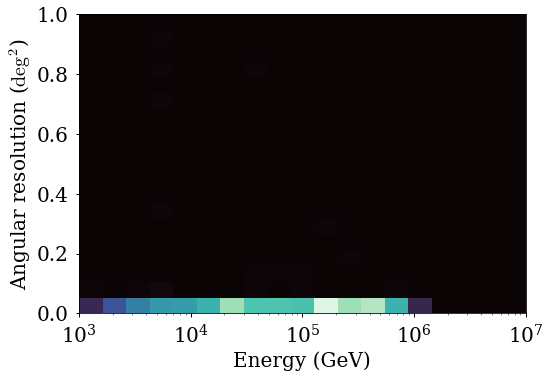

All events used: False


In [29]:
angmin = 0
angmax = 1
engmin = 1E3
engmax = 1E7


angbins = np.linspace(angmin ** 2, angmax ** 2, 20)
engbins = np.logspace(np.log10(engmin), np.log10(engmax), 20)

plt.xlabel("Energy (GeV)")
plt.ylabel("Angular resolution ($\deg^2$)")
n, xbins, ybins, image = plt.hist2d(
    dat["muon_energy"], dat["resolution_linefitNew"] ** 2, bins=[engbins, angbins]
)
plt.xscale("log")
plt.show()

print(f"All events used: {len(dat)==np.sum(n)}")


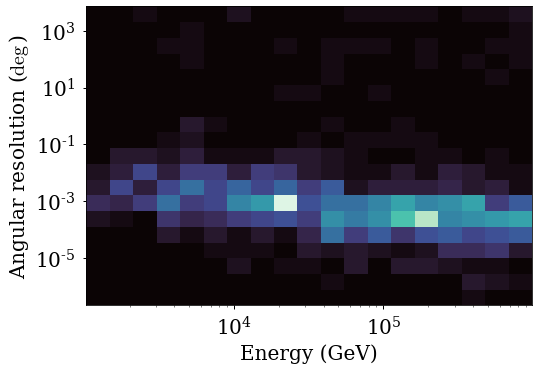

All events used: True


In [ ]:
eps = 1e-10
angmin = (np.min(dat["resolution_linefitNew"]) - eps) ** 2
angmax = (np.max(dat["resolution_linefitNew"]) + eps) ** 2
engmin = np.min(dat["muon_energy"]) - eps
engmax = np.max(dat["muon_energy"]) + eps


angbins = np.logspace(np.log10(angmin), np.log10(angmax), 20)
engbins = np.logspace(np.log10(engmin), np.log10(engmax), 20)

plt.xlabel("Energy (GeV)")
plt.ylabel("Angular resolution ($\deg$)")
n, xbins, ybins, image = plt.hist2d(
    dat["muon_energy"], dat["resolution_linefitNew"] ** 2, bins=[engbins, angbins]
)
plt.yscale("log")
plt.xscale("log")
plt.show()

print(f"All events used: {len(dat)==np.sum(n)}")
